<a href="https://colab.research.google.com/github/Dhivyaindhu/TECHNO_HACKS_TASK_3/blob/main/Untitled99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

# Try reading the file with a different encoding, like 'latin-1'
data = pd.read_csv('/content/spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [7]:
df=pd.DataFrame(data)
print(df.columns)

# Drop unnecessary or unnamed columns
df = df[['v1', 'v2']]

# Rename columns for clarity
df.columns = ['label', 'text']

# Check for any missing values and drop them
df.dropna(inplace=True)

# Convert labels to binary values: 1 for spam, 0 for not spam
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

# Display the first few rows after cleaning
print(df.head())


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


Data Preprocessing

In [8]:
# Split the data into features and labels
X = df['text']
y = df['label']

# Convert text data into numerical data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)


In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Training of the model

In [10]:
# Initialize the model
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)


MultinomialNB()

Evaluation of the model

In [11]:
# Predict on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))


Accuracy: 97.85%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.93      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115

[[952  13]
 [ 11 139]]


Visualization

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve


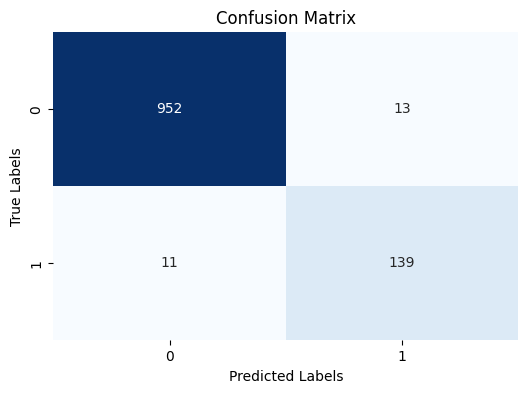

In [13]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


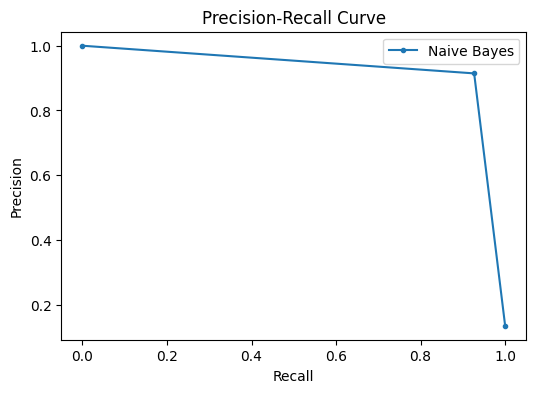

In [14]:
# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot precision-recall curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.', label='Naive Bayes')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


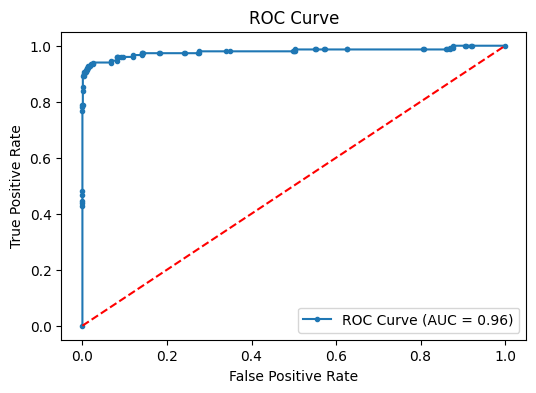

In [15]:
# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, marker='.', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


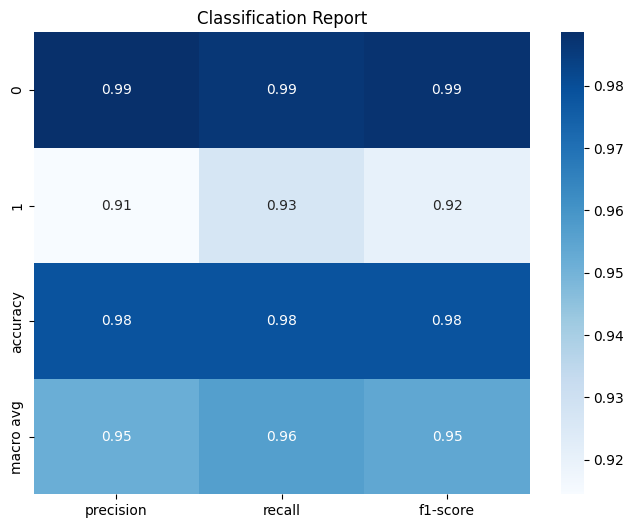

In [16]:
# Generate classification report
from sklearn.metrics import classification_report
import pandas as pd

# Get classification report as a dictionary
class_report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
class_report_df = pd.DataFrame(class_report).transpose()

# Plot the classification report as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(class_report_df.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()


Real-world Application

In [22]:
!pip install fastapi uvicorn pyngrok joblib


In [23]:
from fastapi import FastAPI, Request
from pydantic import BaseModel
import joblib
import uvicorn
from pyngrok import ngrok


In [26]:
import joblib

# Assuming 'model' is your trained model and 'vectorizer' is your fitted vectorizer

# Correct usage: Specify both the object and the filename
joblib.dump(model, 'spam_filter_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']

In [27]:


# Load the model and vectorizer
model = joblib.load('spam_filter_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

# Define the FastAPI application
app = FastAPI()

# Define a request model to capture the input data
class Email(BaseModel):
    text: str

# Define the prediction endpoint
@app.post('/predict')
async def predict_spam(email: Email):
    # Transform the input email text using the vectorizer
    email_text = [email.text]
    email_vectorized = vectorizer.transform(email_text)

    # Make the prediction
    prediction = model.predict(email_vectorized)

    # Return the prediction as a JSON response
    return {"prediction": int(prediction[0])}


In [28]:
!pip install pyngrok
from pyngrok import ngrok


In [30]:
# Replace 'YOUR_NGROK_AUTHTOKEN' with your actual authtoken
ngrok.set_auth_token("2gffRvUOzIvmlp8lgT2pcGeCFA4_2exmXo7SyTHoKrqJN9Y9d")


In [31]:
# Start a new ngrok tunnel on port 8000
public_url = ngrok.connect(8000)
print("Public URL:", public_url)


Public URL: NgrokTunnel: "https://88e1-104-197-253-31.ngrok-free.app" -> "http://localhost:8000"


In [34]:
import uvicorn

# Run the FastAPI app with uvicorn in a separate thread
import threading

def run_server():
    uvicorn.run(app, host='0.0.0.0', port=8000)

# Create a thread for the server
server_thread = threading.Thread(target=run_server)

# Start the server thread
server_thread.start()

INFO:     Started server process [187]
/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py:209: RuntimeWarning: coroutine 'Server.serve' was never awaited
  functools.partial(callback, *args, **kwargs),
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
